In [1]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, CatBoostRegressor
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

In [2]:
data = pd.read_csv('ONTI_Dataset_parsed.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'Coolness_RHEED', 'Length_RHEED', 'R FWHM_RHEED',
       'Speed_RHEED', 'Time_RHEED', 'X FWHM_RHEED', 'Y FWHM_RHEED',
       'Crystal Position', 'Displayed Rate', 'Filtered Rate',
       'Fundamental Freq', 'Length', 'Raw Rate', 'Source Power', 'Speed',
       'Time'],
      dtype='object')

In [4]:
val_col = ['Coolness_RHEED', 'Filtered Rate', 'Source Power', 'Length', 'R FWHM_RHEED']
data = data[val_col]
data = data.fillna(data.median(axis=0), axis=0)
data
#выбери колонки

,Coolness_RHEED,Filtered Rate,Displayed Rate,Raw Rate,Source Power,Length,R FWHM_RHEED,Y FWHM_RHEED
0,0.0,6.000000,6.027000,5.990,21.64,0.003721,0.0,0.0
1,0.0,6.094000,6.070000,6.110,21.06,0.028870,0.0,0.0
2,0.0,6.082000,6.156000,6.168,20.97,0.040400,0.0,0.0
3,0.0,6.168000,6.110000,6.156,20.70,0.067750,0.0,0.0
4,0.0,6.168000,6.094000,6.145,20.60,0.083560,0.0,0.0
...,...,...,...,...,...,...,...,...
2363767,0.0,0.003712,0.012375,0.000,3.00,1733.000000,0.0,0.0
2363768,0.0,0.004330,0.000000,0.000,3.00,1733.000000,0.0,0.0
2363769,0.0,0.004020,0.000000,0.000,3.00,1733.000000,0.0,0.0
2363770,0.0,0.004020,0.012375,0.000,3.00,1733.000000,0.0,0.0


In [5]:
df = data

In [6]:
df['Cool'] = df['Coolness_RHEED']
Cool = df['Coolness_RHEED']
Cool = Cool.shift(periods=-435)
df['Coolness_RHEED'] = Cool

In [7]:
df = df[:len(df)-435]
#Coolness_RHEED - это значение через 435 измерений
#Cool - это значение сейчас

In [8]:
df_mean = df.rolling(window=50).mean()
df_mean['Dif'] = (df_mean['Coolness_RHEED'] + 5 <= df_mean['Cool'])
#df_mean['Dif'].value_counts() False -> 2310797 раз, True -> 52540 раз

In [9]:
df

,Coolness_RHEED,Filtered Rate,Displayed Rate,Raw Rate,Source Power,Length,R FWHM_RHEED,Y FWHM_RHEED,Cool
0,0.0,6.00000,6.027,5.990,21.64,0.003721,0.0,0.0,0.0
1,0.0,6.09400,6.070,6.110,21.06,0.028870,0.0,0.0,0.0
2,0.0,6.08200,6.156,6.168,20.97,0.040400,0.0,0.0,0.0
3,0.0,6.16800,6.110,6.156,20.70,0.067750,0.0,0.0,0.0
4,0.0,6.16800,6.094,6.145,20.60,0.083560,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2363332,0.0,0.00464,0.000,0.000,3.00,1724.000000,0.0,0.0,0.0
2363333,0.0,0.00402,0.000,0.000,3.00,1724.000000,0.0,0.0,0.0
2363334,0.0,0.00433,0.000,0.000,3.00,1724.000000,0.0,0.0,0.0
2363335,0.0,0.00464,0.000,0.000,3.00,1724.000000,0.0,0.0,0.0


In [192]:
#otr = [[3500, 71000](0.710), [76000, 114500](0.757), [120000, 154000](0.695), [158000,224000](0.808), [227000, 335000](0.325), 
#  [341000, 410000](0.562), [415500, 492000](0.787), [495000, 597000](0.907), [676000, 738000](0.411), [746000, 833000](0.792), 
#  [845000, 923000](0.477), [929000, 1012000](0.940)]
check_X = df[50:929000]
check_X = check_X.append(df[1012000:], ignore_index = True)
check_y = df_mean['Dif'][50:929000].astype(float)
check_y = check_y.append(df_mean['Dif'][1012000:], ignore_index = True).astype(float)

In [193]:
X = df[929000:1012000]
y = df_mean['Dif'][929000:1012000].astype(float)

In [199]:
import random
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import joblib
import scipy as sp
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import sklearn
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.linear_model import LogisticRegression, Ridge, RidgeClassifier
import sklearn
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [200]:
cat = CatBoostClassifier(loss_function='Logloss', custom_loss = 'AUC', early_stopping_rounds = 50)

cat.fit(X_train, y_train, eval_set=(check_X, check_y), use_best_model=True)

Learning rate set to 0.087915
0:	learn: 0.4616763	test: 0.5041661	best: 0.5041661 (0)	total: 142ms	remaining: 2m 21s
1:	learn: 0.3032815	test: 0.3542610	best: 0.3542610 (1)	total: 298ms	remaining: 2m 28s
2:	learn: 0.1989431	test: 0.2902533	best: 0.2902533 (2)	total: 440ms	remaining: 2m 26s
3:	learn: 0.1374632	test: 0.2076680	best: 0.2076680 (3)	total: 584ms	remaining: 2m 25s
4:	learn: 0.0979440	test: 0.1843332	best: 0.1843332 (4)	total: 733ms	remaining: 2m 25s
5:	learn: 0.0694019	test: 0.1469405	best: 0.1469405 (5)	total: 901ms	remaining: 2m 29s
6:	learn: 0.0542341	test: 0.1181148	best: 0.1181148 (6)	total: 1.05s	remaining: 2m 28s
7:	learn: 0.0427599	test: 0.1054282	best: 0.1054282 (7)	total: 1.19s	remaining: 2m 27s
8:	learn: 0.0320780	test: 0.0981642	best: 0.0981642 (8)	total: 1.33s	remaining: 2m 26s
9:	learn: 0.0254526	test: 0.0938965	best: 0.0938965 (9)	total: 1.48s	remaining: 2m 26s
10:	learn: 0.0212522	test: 0.0935303	best: 0.0935303 (10)	total: 1.62s	remaining: 2m 25s
11:	learn: 

In [201]:
cat.predict_proba(X)[-1][1]

0.8297443154319184

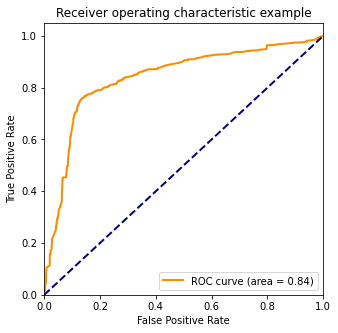

In [202]:
fpr, tpr, _ = sklearn.metrics.roc_curve(check_y, cat.predict_proba(check_X)[:,1])
roc_auc = sklearn.metrics.roc_auc_score(check_y, cat.predict_proba(check_X)[:,1])
plt.figure()
lw = 2
plt.plot(fpr, tpr,color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [203]:
import pickle
with open("model.pkl","wb") as f:
    pickle.dump(cat,f)